<a href="https://colab.research.google.com/github/annalamboglia/Minicontest3/blob/main/Soluzione_Minicontest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_profiling as pp
from pandas_profiling import ProfileReport


In [ ]:
#Collegamento al Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
 
# specify your path of directory
path = r"/content/drive/MyDrive/Minicontest3/"
 
# call listdir() method
# path is a directory of which you want to list
directories = os.listdir(path)
 
# This would print all the files and directories
for file in directories:
   print(file)
 

training_set
validation_set
test_set


In [ ]:
#importo i path
path_validation=r"/content/drive/MyDrive/Minicontest3/validation_set"
path_train=r"/content/drive/MyDrive/Minicontest3/training_set"
path_test=r"/content/drive/MyDrive/Minicontest3/test_set"

#Importo il train

In [ ]:
temp={}
df_train={}

temp_completo={}
df_train_completo={}

with os.scandir(path_train) as directories_training:
    for entry in directories_training:
      numero=entry.name.split('.')
      #print(numero)
      data=np.load(path_train+'/'+(numero[0])+'.npy',allow_pickle=True)
      data_senza_ultimo_valore=np.array([data[0],data[1]])
      temp={numero[0]: data_senza_ultimo_valore}
      df_train.update(temp)
      temp_completo={numero[0]: data}
      df_train_completo.update(temp_completo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [ ]:
df_train['22'][0]

array([[-1.76134303, -1.59083223, -3.02445341, ..., -1.96686512,
        -2.59374366, -0.73697182],
       [-0.67979466, -1.61064195, -1.96959973, ..., -1.94539284,
        -1.98373996, -0.76192115],
       [-0.4572548 , -0.67757358, -0.97162809, ..., -1.76334765,
        -1.93246909, -0.60262084],
       ...,
       [-2.14535214, -1.93907645, -1.77030152, ..., -1.78950879,
        -2.05212712, -2.44297487],
       [-1.88023913, -2.18643322, -2.50355541, ..., -2.13318846,
        -2.32859958, -2.52768624],
       [-2.6199512 , -3.22838133, -3.04972174, ..., -2.09261173,
        -2.44512462, -2.35002849]])

#HO CONTROLLATO LE CATEGORIE ED è TUTTO OK

In [ ]:
for key in df_train_completo.keys():
  categoria=df_train_completo[key][1]
  if df_train_completo[key][2][categoria]==1:
    pass
    #print(str(key) + " OK")
  else:
    print(str(key) + " NON COINCIDE")


#Controllo se le dimensioni sono tutte uguali o no

In [ ]:
righe_da_eliminare_train=[]

for key in df_train.keys():
  shape=df_train[key][0].shape
  if str(shape)=="(960, 64)":
    pass
    #print(str(key) + " OK")
  else:
    righe_da_eliminare_train.append(key)
    print(str(key) + " NON COINCIDE " + str(shape) +" "+ str(df_train[key][1]))

295 NON COINCIDE (288, 64) 2
307 NON COINCIDE (384, 64) 2
302 NON COINCIDE (480, 64) 2
304 NON COINCIDE (480, 64) 2
308 NON COINCIDE (864, 64) 2
342 NON COINCIDE (864, 64) 2
346 NON COINCIDE (384, 64) 2
335 NON COINCIDE (864, 64) 2
349 NON COINCIDE (864, 64) 2
352 NON COINCIDE (672, 64) 2
381 NON COINCIDE (864, 64) 2
378 NON COINCIDE (480, 64) 2
374 NON COINCIDE (864, 64) 2
415 NON COINCIDE (864, 64) 2
437 NON COINCIDE (864, 64) 2
431 NON COINCIDE (864, 64) 2
423 NON COINCIDE (864, 64) 2
470 NON COINCIDE (864, 64) 2
447 NON COINCIDE (864, 64) 2
457 NON COINCIDE (768, 64) 2
473 NON COINCIDE (576, 64) 2
496 NON COINCIDE (864, 64) 2
494 NON COINCIDE (864, 64) 2
519 NON COINCIDE (864, 64) 2
508 NON COINCIDE (768, 64) 2
510 NON COINCIDE (864, 64) 2
537 NON COINCIDE (288, 64) 2
552 NON COINCIDE (864, 64) 2
572 NON COINCIDE (864, 64) 2
248 NON COINCIDE (576, 64) 2
265 NON COINCIDE (864, 64) 2
267 NON COINCIDE (384, 64) 2


tutti i valori che hanno una differente dimensione sono categorizzati come 2

In [ ]:
righe_da_eliminare_train

['295',
 '307',
 '302',
 '304',
 '308',
 '342',
 '346',
 '335',
 '349',
 '352',
 '381',
 '378',
 '374',
 '415',
 '437',
 '431',
 '423',
 '470',
 '447',
 '457',
 '473',
 '496',
 '494',
 '519',
 '508',
 '510',
 '537',
 '552',
 '572',
 '248',
 '265',
 '267']

In [ ]:
for key in righe_da_eliminare_train:
  df_train.pop(key)

#Ordino

In [ ]:
import collections
df_train=collections.OrderedDict(sorted(df_train.items()))

#Importo il validation

In [ ]:
temp={}
df_validation={}

temp_completo={}
df_validation_completo={}

with os.scandir(path_validation) as directories:
    for entry in directories:
      numero=entry.name.split('.')
      #print(numero)
      data=np.load(path_validation+'/'+(numero[0])+'.npy',allow_pickle=True)
      data_senza_ultimo_valore=np.array([data[0],data[1]])
      temp={numero[0]: data_senza_ultimo_valore}
      df_validation.update(temp)
      temp_completo={numero[0]: data}
      df_validation_completo.update(temp_completo)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [ ]:
df_validation.keys()

dict_keys(['1012 (1) (1)', '1010 (2)', '1012 (1)', '1011 (2)', '1010 (1)', '1011 (1)', '1010', '1012', '1011', '1015 (2)', '1014 (1) (1)', '1015', '1013 (2)', '1013 (1)', '1013', '1014 (1)', '1015 (1)', '1014', '1000', '1001', '1007', '1003', '1002', '1004', '1005', '1008', '1009', '1006', '1016', '1017', '1018', '1019', '1020', '1025', '1023', '1024', '1022', '1026', '1021', '1027', '858', '859', '860', '861', '862', '864', '863', '866', '865', '867', '868', '869', '870', '871', '872', '873', '874', '875', '876', '877', '878', '879', '881', '882', '885', '886', '880', '887', '888', '889', '883', '884', '892', '890', '893', '891', '895', '896', '894', '897', '899', '900', '898', '901', '902', '903', '904', '905', '906', '907', '908', '909', '911', '910', '912', '913', '914', '915', '916', '917', '918', '919', '921', '920', '922', '923', '924', '925', '926', '927', '928', '929', '930', '931', '932', '933', '935', '934', '936', '937', '938', '940', '939', '941', '942', '943', '945', '944

In [ ]:
df_validation['1004'][0].shape

(960, 64)

In [ ]:
for key in df_validation_completo.keys():
  categoria=df_validation_completo[key][1]
  if df_validation_completo[key][2][categoria]==1:
    pass
    #print(str(key) + " OK")
  else:
    print(str(key) + " NON COINCIDE")


In [ ]:
righe_da_eliminare_validation=[]

for key in df_validation.keys():
  shape=df_validation[key][0].shape
  if str(shape)=="(960, 64)":
    pass
    #print(str(key) + " OK")
  else:
    righe_da_eliminare_validation.append(key)
    print(str(key) + " NON COINCIDE " + str(shape) +" "+ str(df_validation[key][1]))

919 NON COINCIDE (864, 64) 2
924 NON COINCIDE (864, 64) 2
926 NON COINCIDE (864, 64) 2
928 NON COINCIDE (864, 64) 2
937 NON COINCIDE (768, 64) 2
941 NON COINCIDE (864, 64) 2
942 NON COINCIDE (864, 64) 2
946 NON COINCIDE (864, 64) 2
972 NON COINCIDE (864, 64) 2
976 NON COINCIDE (672, 64) 2


anche in questo caso

In [ ]:
righe_da_eliminare_validation

['919', '924', '926', '928', '937', '941', '942', '946', '972', '976']

In [ ]:
for key in righe_da_eliminare_validation:
  df_validation.pop(key)

#Ordino

In [ ]:
import collections
df_validation=collections.OrderedDict(sorted(df_train.items()))

#Prova dataframe

In [ ]:
lista_matrici_train=[]
lista_classi_train=[]

for i in df_train.keys():
  lista_matrici_train.append(np.reshape(df_train[i][0],-1))
  lista_classi_train.append(df_train[i][1])


In [ ]:
lista_matrici_train[0]

array([-2.2335279 , -1.58671117, -1.87625703, ..., -2.77106125,
       -2.70970002, -3.09402706])

In [ ]:
lista_matrici_validation=[]
lista_classi_validation=[]

for i in df_validation.keys():
  lista_matrici_validation.append(np.reshape(df_validation[i][0],-1))
  lista_classi_validation.append(df_validation[i][1])

In [ ]:
columns=[]
for i in range(1,61441):
  columns.append(i)

In [ ]:
df_finale_train = pd.DataFrame(lista_matrici_train,columns = columns) 
df_finale_validation = pd.DataFrame(lista_matrici_validation,columns = columns) 

In [ ]:
df_finale_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61401,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439,61440
0,-2.233528,-1.586711,-1.876257,-1.379101,-0.157902,0.062421,-0.794942,-1.862541,0.402372,0.900782,0.172826,0.830417,1.753367,1.521758,-0.227920,0.118008,-0.155501,-1.802015,-0.951065,-0.997919,-1.911218,-1.371493,-1.966502,-1.592796,-2.013993,-0.474853,-0.366308,-0.938851,-0.679671,-0.545317,-0.648761,-0.724107,-0.813877,-0.498338,-0.671259,-1.678637,-1.169341,-0.061744,-0.799726,-1.816971,...,-2.346816,-3.182404,-2.559712,-1.646037,-1.165796,-0.784626,-1.256929,-1.936449,-1.312574,-0.073320,-0.402056,-1.900590,-2.006240,-0.297005,-0.762096,-1.835116,-1.709288,-2.315486,-2.491416,-2.630470,-1.313927,-0.623722,-2.020066,-2.059927,-2.297432,-2.900579,-2.428593,-2.487917,-2.598485,-2.675898,-2.271407,-2.761286,-2.809012,-2.532943,-2.878193,-2.738440,-2.542784,-2.771061,-2.709700,-3.094027
1,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,3.733580,2.480460,-0.219213,-0.753567,-0.352720,0.015845,-0.050917,2.997861,3.866044,1.610964,0.629354,0.721838,-0.379466,0.409477,3.229070,2.880560,1.826264,0.794511,-0.041669,0.770073,1.764744,0.656956,-1.440668,-1.063357,-1.377578,-0.770918,-0.564596,-1.277042,-1.172431,-1.663312,-1.180691,-1.440346,-2.021544,-1.656624,-1.436014,-1.631093,-1.285091,-1.591510,-1.318559,-1.532964
2,-1.787013,-1.182501,-1.142880,-1.925701,-0.910263,-0.471111,-0.674928,-0.603660,-0.785000,-1.649640,-1.847900,-1.386234,-0.942144,-0.561702,-1.680918,-1.750204,-1.507117,-1.465707,-1.497670,-1.400720,-1.557918,-1.836172,-1.318144,-1.585245,-1.675831,-2.047295,-2.436650,-1.728792,-1.110694,-1.191208,-1.410191,-1.204746,-1.140084,-0.993564,-1.219738,-0.578108,-1.507937,-1.286656,-2.399751,-1.872294,...,-1.004509,-1.123794,-1.573378,-1.570454,-1.557271,-1.831400,-1.517541,-1.744913,-1.053212,-1.080429,-1.173281,-1.236894,-1.240962,-0.661946,-0.160201,-0.051653,-1.804979,-2.145175,-1.835909,-1.850634,-0.746219,-1.750904,-2.193397,-2.254160,-2.095707,-2.357799,-2.168501,-1.890906,-2.151978,-2.740909,-2.137046,-2.702889,-2.741624,-2.481007,-2.347025,-2.864923,-2.590754,-2.758623,-2.973360,-2.789347
3,-2.177359,-1.793080,-1.882719,-2.238325,-3.049254,-3.335193,-3.302713,-3.069784,-2.476147,-2.205787,-2.352953,-2.657912,-2.934876,-2.642250,-2.102104,-2.576360,-3.007704,-1.393854,-1.374611,-1.998567,-2.896729,-3.255370,-2.941348,-3.179168,-2.223555,-1.965654,-2.507354,-2.758335,-3.700514,-3.434596,-3.175880,-2.855322,-1.712011,-2.242398,-3.128258,-3.602249,-3.779273,-3.387555,-0.152624,-0.117587,...,-2.856469,-2.957770,-2.400509,-1.686334,-2.102401,-2.721072,-2.711858,-2.338430,-2.512481,-3.083169,-3.176096,-2.125359,-2.309025,-2.570825,-0.566820,-0.932793,-2.358626,-2.207768,-1.332694,-1.591996,-2.766997,-2.652813,-3.173083,-2.856787,-2.872173,-2.981549,-3.145172,-2.894518,-2.449553,-3.283255,-3.117213,-2.498924,-2.171676,-3.243939,-3.572428,-3.548414,-3.267280,-3.593929,-3.128488,-3.484360
4,-1.752308,-1.398402,-1.318326,-0.578483,-0.138002,-0.492389,-1.391143,-1.412349,-1.435698,-1.895934,-1.476551,-1.831046,-2.403909,-1.737896,-1.929482,-1.729831,-1.939368,-1.613320,-1.059256,-1.704221,-2.227351,-2.183756,-1.759116,-1.793939,-1.327896,-1.292133,-1.129018,-1.923725,-1.422862,-1.812823,-2.053751,-2.380929,-1.531767,-1.334884,-1.920071,-1.879260,-0.225561,-0.890665,-1.147045,-1.668787,...,-1.398427,-1.411739,-1.364286,-0.95861

In [ ]:
df_finale_validation

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61401,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439,61440
0,-1.222152,-1.176543,-1.199495,-1.213365,-1.402761,-1.779119,-1.897457,-1.534727,-2.084083,-2.418982,-2.305201,-2.010822,-2.472278,-2.521412,-2.004032,-2.047303,-1.542746,-1.574861,-2.346877,-2.534603,-2.782483,-2.307885,-2.915116,-2.575077,-2.658676,-1.744475,-1.649215,-2.264803,-2.159106,-2.100615,-1.581875,-1.372052,-1.520850,-1.072281,-1.464594,-1.222896,-1.564641,-1.304792,-0.791010,-1.065905,...,-3.467746,-3.676855,-3.468760,-3.388083,-3.047294,-3.470065,-3.577410,-3.894716,-3.729474,-3.890337,-3.723618,-3.539769,-3.418654,-3.566144,-3.321291,-3.838626,-3.691911,-3.396285,-3.339399,-3.197452,-3.593138,-3.837670,-3.980974,-3.898726,-3.870537,-3.809011,-3.831772,-3.855661,-3.713701,-3.917019,-4.029203,-4.077286,-3.854110,-3.758586,-3.848373,-3.893718,-3.434423,-3.724162,-3.755662,-3.402248
1,-0.109239,-0.170905,0.133632,0.355469,0.169315,-0.332010,-0.562461,0.063877,0.392588,-0.114329,-0.621054,-0.878728,-1.002511,-0.366099,-0.613427,-0.534056,-0.303718,-0.331385,-0.049889,-0.820178,-1.315263,-0.995866,-0.390026,-0.296142,-0.801408,-0.372558,-0.236942,-0.480556,-0.220269,0.040040,0.069347,-0.529144,-0.349543,-0.691166,-0.747776,-0.530302,-0.347161,-0.507534,-0.846803,-0.814109,...,-0.888309,-1.175636,-1.395007,-1.125833,-1.224169,-1.386440,-0.434061,-0.494512,-1.285911,-1.677871,-0.894029,-0.848828,-0.454745,-0.597661,-1.115189,-0.550971,-0.401253,-1.002760,-1.241175,-1.380098,-1.251709,-1.440892,-1.396179,-1.570397,-1.149842,-1.610138,-1.400651,-1.696959,-1.984376,-1.648145,-1.438887,-1.272176,-1.639755,-2.580096,-2.574671,-2.345434,-1.939570,-1.889429,-2.076863,-2.828067
2,-1.222152,-1.176543,-1.199495,-1.213365,-1.402761,-1.779119,-1.897457,-1.534727,-2.084083,-2.418982,-2.305201,-2.010822,-2.472278,-2.521412,-2.004032,-2.047303,-1.542746,-1.574861,-2.346877,-2.534603,-2.782483,-2.307885,-2.915116,-2.575077,-2.658676,-1.744475,-1.649215,-2.264803,-2.159106,-2.100615,-1.581875,-1.372052,-1.520850,-1.072281,-1.464594,-1.222896,-1.564641,-1.304792,-0.791010,-1.065905,...,-3.467746,-3.676855,-3.468760,-3.388083,-3.047294,-3.470065,-3.577410,-3.894716,-3.729474,-3.890337,-3.723618,-3.539769,-3.418654,-3.566144,-3.321291,-3.838626,-3.691911,-3.396285,-3.339399,-3.197452,-3.593138,-3.837670,-3.980974,-3.898726,-3.870537,-3.809011,-3.831772,-3.855661,-3.713701,-3.917019,-4.029203,-4.077286,-3.854110,-3.758586,-3.848373,-3.893718,-3.434423,-3.724162,-3.755662,-3.402248
3,-1.153344,0.218993,0.119797,-1.150032,-1.150831,-0.224336,0.186980,0.192048,0.310603,0.031777,-1.223955,-0.852374,-0.159494,-0.099458,0.042999,0.156789,0.271717,-0.155452,-0.126871,-0.529299,-0.967634,-0.799723,0.064782,0.018472,-0.737268,-0.452735,0.006090,0.137584,-0.318176,-1.146013,-0.365700,-0.443473,-0.378346,-0.380775,-0.787699,-0.884520,-1.432672,-1.628067,-1.691805,-0.891665,...,0.654725,0.103338,-0.152753,0.205511,0.519862,-0.120588,0.046978,-0.263982,-0.828864,-0.541034,-0.090519,-0.195022,-0.340572,-0.703443,-0.649683,-0.909626,-0.841146,-0.467922,0.075762,-0.448797,0.307165,-0.769026,-0.707976,-0.459869,-0.104365,-0.366538,-0.434217,-0.445676,-0.061009,-0.654955,-0.373279,-0.298886,-0.931257,-1.218616,-0.732783,-0.238809,-0.318836,-0.270078,-0.018890,0.031869
4,-0.109239,-0.170905,0.133632,0.355469,0.169315,-0.332010,-0.562461,0.063877,0.392588,-0.114329,-0.621054,-0.878728,-1.002511,-0.366099,-0.613427,-0.534056,-0.303718,-0.331385,-0.049889,-0.820178,-1.315263,-0.995866,-0.390026,-0.296142,-0.801408,-0.372558,-0.236942,-0.480556,-0.220269,0.040040,0.069347,-0.529144,-0.349543,-0.691166,-0.747776,-0.530302,-0.347161,-0.507534,-0.846803,-0.814109,...,-0.888309,-1.175636,-1.395007,-1.125833,-1.224169

#Aggiungo le classi

In [ ]:
classi_train=pd.DataFrame(lista_classi_train, columns=["Classe"])

classi_validation=pd.DataFrame(lista_classi_validation, columns=["Classe"])

classi_train
classi_validation

,Classe
0,1
1,1
2,1
3,1
4,1
...,...
167,1
168,1
169,1
170,1


In [ ]:
# concatenating along columns
concat = pd.concat([df_finale_train, classi_train], axis=1)
concat_validation = pd.concat([df_finale_validation, classi_validation], axis=1)

In [ ]:
concat

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439,61440,Classe
0,-2.233528,-1.586711,-1.876257,-1.379101,-0.157902,0.062421,-0.794942,-1.862541,0.402372,0.900782,0.172826,0.830417,1.753367,1.521758,-0.227920,0.118008,-0.155501,-1.802015,-0.951065,-0.997919,-1.911218,-1.371493,-1.966502,-1.592796,-2.013993,-0.474853,-0.366308,-0.938851,-0.679671,-0.545317,-0.648761,-0.724107,-0.813877,-0.498338,-0.671259,-1.678637,-1.169341,-0.061744,-0.799726,-1.816971,...,-3.182404,-2.559712,-1.646037,-1.165796,-0.784626,-1.256929,-1.936449,-1.312574,-0.073320,-0.402056,-1.900590,-2.006240,-0.297005,-0.762096,-1.835116,-1.709288,-2.315486,-2.491416,-2.630470,-1.313927,-0.623722,-2.020066,-2.059927,-2.297432,-2.900579,-2.428593,-2.487917,-2.598485,-2.675898,-2.271407,-2.761286,-2.809012,-2.532943,-2.878193,-2.738440,-2.542784,-2.771061,-2.709700,-3.094027,0
1,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,2.480460,-0.219213,-0.753567,-0.352720,0.015845,-0.050917,2.997861,3.866044,1.610964,0.629354,0.721838,-0.379466,0.409477,3.229070,2.880560,1.826264,0.794511,-0.041669,0.770073,1.764744,0.656956,-1.440668,-1.063357,-1.377578,-0.770918,-0.564596,-1.277042,-1.172431,-1.663312,-1.180691,-1.440346,-2.021544,-1.656624,-1.436014,-1.631093,-1.285091,-1.591510,-1.318559,-1.532964,0
2,-1.787013,-1.182501,-1.142880,-1.925701,-0.910263,-0.471111,-0.674928,-0.603660,-0.785000,-1.649640,-1.847900,-1.386234,-0.942144,-0.561702,-1.680918,-1.750204,-1.507117,-1.465707,-1.497670,-1.400720,-1.557918,-1.836172,-1.318144,-1.585245,-1.675831,-2.047295,-2.436650,-1.728792,-1.110694,-1.191208,-1.410191,-1.204746,-1.140084,-0.993564,-1.219738,-0.578108,-1.507937,-1.286656,-2.399751,-1.872294,...,-1.123794,-1.573378,-1.570454,-1.557271,-1.831400,-1.517541,-1.744913,-1.053212,-1.080429,-1.173281,-1.236894,-1.240962,-0.661946,-0.160201,-0.051653,-1.804979,-2.145175,-1.835909,-1.850634,-0.746219,-1.750904,-2.193397,-2.254160,-2.095707,-2.357799,-2.168501,-1.890906,-2.151978,-2.740909,-2.137046,-2.702889,-2.741624,-2.481007,-2.347025,-2.864923,-2.590754,-2.758623,-2.973360,-2.789347,0
3,-2.177359,-1.793080,-1.882719,-2.238325,-3.049254,-3.335193,-3.302713,-3.069784,-2.476147,-2.205787,-2.352953,-2.657912,-2.934876,-2.642250,-2.102104,-2.576360,-3.007704,-1.393854,-1.374611,-1.998567,-2.896729,-3.255370,-2.941348,-3.179168,-2.223555,-1.965654,-2.507354,-2.758335,-3.700514,-3.434596,-3.175880,-2.855322,-1.712011,-2.242398,-3.128258,-3.602249,-3.779273,-3.387555,-0.152624,-0.117587,...,-2.957770,-2.400509,-1.686334,-2.102401,-2.721072,-2.711858,-2.338430,-2.512481,-3.083169,-3.176096,-2.125359,-2.309025,-2.570825,-0.566820,-0.932793,-2.358626,-2.207768,-1.332694,-1.591996,-2.766997,-2.652813,-3.173083,-2.856787,-2.872173,-2.981549,-3.145172,-2.894518,-2.449553,-3.283255,-3.117213,-2.498924,-2.171676,-3.243939,-3.572428,-3.548414,-3.267280,-3.593929,-3.128488,-3.484360,0
4,-1.752308,-1.398402,-1.318326,-0.578483,-0.138002,-0.492389,-1.391143,-1.412349,-1.435698,-1.895934,-1.476551,-1.831046,-2.403909,-1.737896,-1.929482,-1.729831,-1.939368,-1.613320,-1.059256,-1.704221,-2.227351,-2.183756,-1.759116,-1.793939,-1.327896,-1.292133,-1.129018,-1.923725,-1.422862,-1.812823,-2.053751,-2.380929,-1.531767,-1.334884,-1.920071,-1.879260,-0.225561,-0.890665,-1.147045,-1.668787,...,-1.411739,-1.364286,-0.958610,-0.202223,-0.714119,-0.735202,-0.65557

In [ ]:
concat.columns

Index([       1,        2,        3,        4,        5,        6,        7,
              8,        9,       10,
       ...
          61432,    61433,    61434,    61435,    61436,    61437,    61438,
          61439,    61440, 'Classe'],
      dtype='object', length=61441)

#Vedo i dati

In [ ]:
concat['Classe'].value_counts()

2    338
1    250
0    249
Name: Classe, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


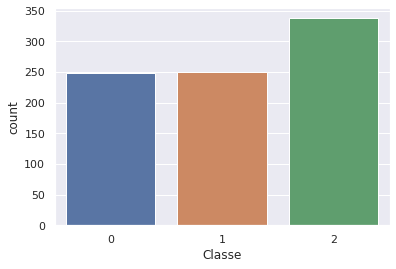

In [ ]:
#Visualize the count
sns.countplot(concat['Classe'], label='count')

In [ ]:
#Count the number of empty values of each columns in dataset
lista=[]
lista=concat.isna().sum()

In [ ]:
print(lista.sort_values)

<bound method Series.sort_values of 1         0
2         0
3         0
4         0
5         0
         ..
61437     0
61438     0
61439     0
61440     0
Classe    0
Length: 61441, dtype: int64>


In [ ]:
concat.shape

(837, 61441)

In [ ]:
df1 = concat[concat.isna().any(axis=1)]

df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439,61440,Classe


In [ ]:
df=concat.fillna(-1)
df_validation=concat_validation.fillna(-1)

#Split

In [ ]:
X=np.array(df.drop(columns='Classe',axis=1))
Y=np.array(df['Classe'])

X_validation=np.array(df_validation.drop(columns='Classe',axis=1))
Y_validation=np.array(df_validation['Classe'])

In [ ]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=0)

#Normalizzazione

In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation=sc.transform(X_validation)
X_test = sc.transform(X_test)

In [ ]:
X_train = np.array(X_train)
X_validation=np.array(X_validation)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_validation=np.array(Y_validation)
Y_test = np.array(Y_test)

In [ ]:
#test model accuracy on test data on confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 

#Decision Tree

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print("DecisionTree Training Accuracy: ", tree.score(X_train,Y_train))
ypred = tree.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_test, ypred))
print("Classification Report : ", classification_report(Y_test, ypred))
#Matrix(Y_test,ypred)


DecisionTree Training Accuracy:  1.0
[[31 24 20]
 [14 43 18]
 [27 16 59]]

Accuracy :  0.5277777777777778
Classification Report :                precision    recall  f1-score   support

           0       0.43      0.41      0.42        75
           1       0.52      0.57      0.54        75
           2       0.61      0.58      0.59       102

    accuracy                           0.53       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.53      0.53      0.53       252



#SVM

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
support_vector_machine = SVC(C=100, kernel='rbf',random_state=40)
support_vector_machine.fit(X_train, Y_train)

print("Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_train,Y_train))
ypred = support_vector_machine.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_test, ypred))
print("Classification Report : ", classification_report(Y_test, ypred))

Support Vector Machine Training Accuracy:  1.0


In [ ]:
print("Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_train,Y_train))
ypred = support_vector_machine.predict(X_validation)
cm = confusion_matrix(Y_validation,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_validation, ypred))
print("Classification Report : ", classification_report(Y_validation, ypred))

provo a vedere se dando tutto il train va bene


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
support_vector_machine = SVC(C=100, kernel='rbf',random_state=40)
support_vector_machine.fit(X, Y)

print("Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_train,Y_train))
ypred = support_vector_machine.predict(X_validation)
cm = confusion_matrix(Y_validation,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_validation, ypred))
print("Classification Report : ", classification_report(Y_validation, ypred))

Support Vector Machine Training Accuracy:  0.6034188034188034
[[ 5 43  2]
 [ 0 62  0]
 [ 4 25 31]]

Accuracy :  0.5697674418604651
Classification Report :                precision    recall  f1-score   support

           0       0.56      0.10      0.17        50
           1       0.48      1.00      0.65        62
           2       0.94      0.52      0.67        60

    accuracy                           0.57       172
   macro avg       0.66      0.54      0.49       172
weighted avg       0.66      0.57      0.51       172



#Provo gli algoritmi

In [ ]:
#Create a function for the models
def models(X_train,Y_train):
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', C=10)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy', random_state=10)
  tree.fit(X_train,Y_train)

  #Random Forest
  #from sklearn.ensemble import RandomForestClassifier
  #forest=RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=2,max_depth=3,random_state=0)
  #forest.fit(X_train,Y_train)

  #Support Vector Machine
  from sklearn.svm import SVC
  support_vector_machine = SVC(C=10, kernel='rbf',gamma=0.5)
  support_vector_machine.fit(X_train, Y_train)

  #NaiveBayes
  from sklearn.naive_bayes import GaussianNB
  NB = GaussianNB()
  NB.fit(X_train, Y_train)

  #KNeighborsRegressor
  from sklearn.neighbors import KNeighborsRegressor
  knn_model = KNeighborsRegressor(n_neighbors=3)
  knn_model.fit(X_train, Y_train)

  print("[0] Logistic Regression Training Accuracy: ", log.score(X_train,Y_train))
  print("[1] Decision Tree Training Accuracy: ", tree.score(X_train,Y_train))
  #print("[2] RandomForestClassifier Training Accuracy: ", forest.score(X_train,Y_train))
  print("[3] Support Vector Machine Training Accuracy: ", support_vector_machine.score(X_train,Y_train))
  print("[4] Nayve Bayes Training Accuracy: ", NB.score(X_train,Y_train))
  print("[5] KNeighborsRegressor Training Accuracy: ", knn_model.score(X_train,Y_train))
  
  return log,tree,support_vector_machine,NB

In [ ]:
#Get all of the models
model = models(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[0] Logistic Regression Training Accuracy:  1.0
[1] Decision Tree Training Accuracy:  1.0
[3] Support Vector Machine Training Accuracy:  1.0
[4] Nayve Bayes Training Accuracy:  0.6581196581196581
[5] KNeighborsRegressor Training Accuracy:  0.6408565883918205


In [ ]:
#test model accuracy on test data on confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 

for i in range(len(model)):
  print("Model: " + str(i))
  ypred = model[i].predict(X_test)
  cm = confusion_matrix(Y_test,ypred)
  print(cm)
  print("\nAccuracy : ", accuracy_score(Y_test, ypred))
  print("Classification Report : ", classification_report(Y_test, ypred))
  #plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

Model: 0
[[50 18  7]
 [ 0 71  4]
 [18 31 53]]

Accuracy :  0.6904761904761905
Classification Report :                precision    recall  f1-score   support

           0       0.74      0.67      0.70        75
           1       0.59      0.95      0.73        75
           2       0.83      0.52      0.64       102

    accuracy                           0.69       252
   macro avg       0.72      0.71      0.69       252
weighted avg       0.73      0.69      0.68       252

Model: 1
[[32 24 19]
 [12 47 16]
 [30 17 55]]

Accuracy :  0.5317460317460317
Classification Report :                precision    recall  f1-score   support

           0       0.43      0.43      0.43        75
           1       0.53      0.63      0.58        75
           2       0.61      0.54      0.57       102

    accuracy                           0.53       252
   macro avg       0.53      0.53      0.53       252
weighted avg       0.54      0.53      0.53       252

Model: 2
[[  0   0  75]
 [  0   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[36 23 16]
 [13 44 18]
 [22 19 61]]

Accuracy :  0.5595238095238095
Classification Report :                precision    recall  f1-score   support

           0       0.51      0.48      0.49        75
           1       0.51      0.59      0.55        75
           2       0.64      0.60      0.62       102

    accuracy                           0.56       252
   macro avg       0.55      0.55      0.55       252
weighted avg       0.56      0.56      0.56       252



In [ ]:
def Matrix(ytest,ypred):
  mat = confusion_matrix(ytest, ypred, normalize = 'true') # evaluate
  plt.figure(figsize=(12, 8), dpi=70)
  sns.heatmap(mat.T*100, square=True, annot=True, vmin=0.0, vmax=100.0, fmt='.1f', cbar=True) # plot via seaborn
  sns.set(font_scale=1.4) # for label size
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label');
  plt.title('Confusion Matrix of model '+ str(i))

#multilayer perceptron

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300], 'alpha': 10.0 ** -np.arange(1, 5), 'hidden_layer_sizes':np.arange(10, 15)}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X, Y)
print(clf.score(X, Y))
print(clf.best_params_)

In [ ]:
print(clf.score(X, Y))
print(clf.best_params_)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(random_state=0,
                    verbose=False,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,Y_train)

MLPClassifier(learning_rate_init=0.01, random_state=0)

MLP
[[48 13 14]
 [ 0 62 13]
 [12 15 75]]

Accuracy :  0.7341269841269841
Classification Report :                precision    recall  f1-score   support

           0       0.80      0.64      0.71        75
           1       0.69      0.83      0.75        75
           2       0.74      0.74      0.74       102

    accuracy                           0.73       252
   macro avg       0.74      0.73      0.73       252
weighted avg       0.74      0.73      0.73       252



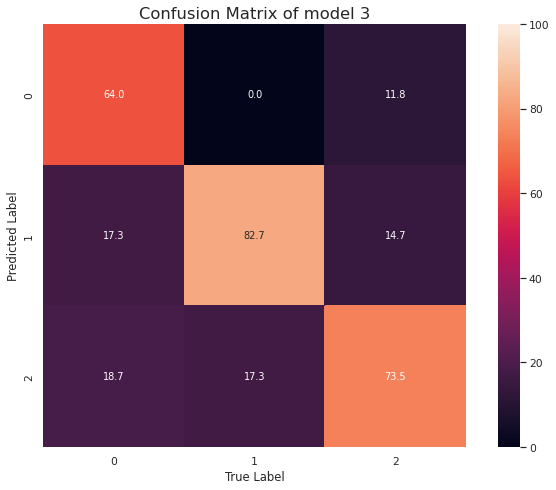

In [ ]:
ypred=clf.predict(X_test)

print("MLP")
cm = confusion_matrix(Y_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_test, ypred))
print("Classification Report : ", classification_report(Y_test, ypred))
Matrix(Y_test,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

MLP
[[35  8  7]
 [ 2 50 10]
 [ 6 16 38]]

Accuracy :  0.7151162790697675
Classification Report :                precision    recall  f1-score   support

           0       0.81      0.70      0.75        50
           1       0.68      0.81      0.74        62
           2       0.69      0.63      0.66        60

    accuracy                           0.72       172
   macro avg       0.73      0.71      0.72       172
weighted avg       0.72      0.72      0.71       172



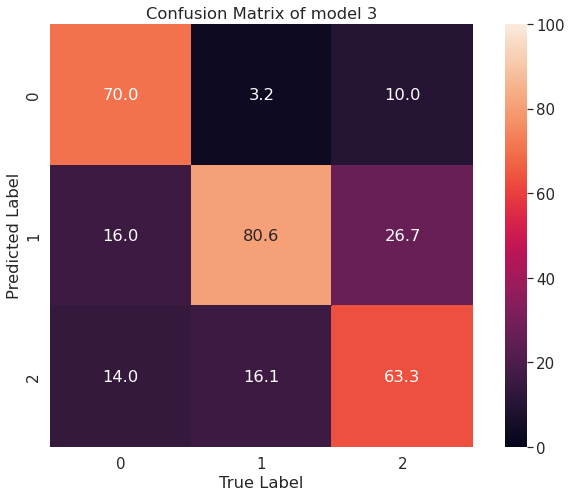

In [ ]:
ypred=clf.predict(X_validation)

print("MLP")
cm = confusion_matrix(Y_validation,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_validation, ypred))
print("Classification Report : ", classification_report(Y_validation, ypred))
Matrix(Y_validation,ypred)
#plot_confusion_matrix(model[i],X_test, Y_test) # evaluate and plot confusion matrix

#SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
pipelineSVC = make_pipeline(SVC(random_state=1))
#
# Create the parameter grid
#
param_grid_svc = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 },
                  {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__degree': [1, 2, 3, 4, 5, 6, 7,8],
                    'svc__kernel': ['poly']
                 }]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=pipelineSVC,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, Y_train)
#
# Print the training score of the best model
#
print(gsSVC.best_score_)
#
# Print the model parameters of the best model
#
print(gsSVC.best_params_)
#
# Print the model score on the test data using GridSearchCV score method
#
print('Test accuracy: %.3f' % gsSVC.score(X_test, Y_test))
#
# Print the model score on the test data using Best estimator instance
#
clfSVC = gsSVC.best_estimator_
print('Test accuracy: %.3f' % clfSVC.score(X_test, Y_test))

#Logistic Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
pipelineLR = make_pipeline(LogisticRegression(random_state=1, penalty='l2', solver='lbfgs'))
#
# Create the parameter grid
#
param_grid_lr = [{
    'logisticregression__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0,100,200,300],
}]
#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=pipelineLR,
                     param_grid = param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train, Y_train)
#
# Print the training score of the best model
#
print(gsLR.best_score_)
#
# Print the model parameters of the best model
#
print(gsLR.best_params_)
#
# Print the test score of the best model
#
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_validation, Y_validation))

NameError: ignored

#Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)

NameError: ignored

In [ ]:
print("Random Forest Training Accuracy: ", forest.score(X_train,Y_train))
ypred = forest.predict(X_test)
cm = confusion_matrix(Y_test,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_test, ypred))
print("Classification Report : ", classification_report(Y_test, ypred))
print(ypred)

Random Forest Training Accuracy:  1.0
[[49 14 12]
 [ 2 58 15]
 [14 11 77]]

Accuracy :  0.7301587301587301
Classification Report :                precision    recall  f1-score   support

           0       0.75      0.65      0.70        75
           1       0.70      0.77      0.73        75
           2       0.74      0.75      0.75       102

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252

[2 2 2 2 0 1 2 0 0 1 2 0 0 0 1 2 2 0 2 1 1 0 2 2 0 1 1 0 0 1 1 0 2 2 2 0 1
 0 0 1 1 0 2 2 1 2 2 1 1 0 1 0 0 0 0 0 1 2 2 1 0 1 2 1 2 1 0 2 1 0 0 1 2 2
 1 2 1 1 1 2 2 2 1 2 2 2 1 2 2 1 2 2 0 1 2 2 0 2 2 1 1 1 0 1 1 2 0 2 2 2 2
 1 1 2 1 0 0 2 1 1 0 0 0 0 2 1 1 2 2 0 2 0 0 2 2 1 0 1 0 1 2 1 1 2 0 1 2 1
 1 2 1 1 2 1 2 1 0 2 0 2 2 1 1 1 2 2 2 2 2 1 2 0 2 2 2 1 0 2 2 0 1 2 2 1 1
 2 2 2 0 2 2 2 2 0 2 2 1 2 0 1 0 2 0 1 0 0 1 1 2 2 1 2 0 2 2 2 2 2 1 2 0 1
 2 1 2 1 1 1 2 0 1 0 1 2 0 2 1 2 0 1 

In [ ]:
print("Random Forest Training Accuracy: ", forest.score(X_train,Y_train))
ypred = forest.predict(X_validation)
cm = confusion_matrix(Y_validation,ypred)
print(cm)
print("\nAccuracy : ", accuracy_score(Y_validation, ypred))
print("Classification Report : ", classification_report(Y_validation, ypred))
print(ypred)

Random Forest Training Accuracy:  1.0
[[38  8  4]
 [ 3 54  5]
 [ 9 11 40]]

Accuracy :  0.7674418604651163
Classification Report :                precision    recall  f1-score   support

           0       0.76      0.76      0.76        50
           1       0.74      0.87      0.80        62
           2       0.82      0.67      0.73        60

    accuracy                           0.77       172
   macro avg       0.77      0.77      0.76       172
weighted avg       0.77      0.77      0.77       172

[0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 2 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 2 2 0 0 0 1 0
 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 1 2
 2 2 2 2 2 2 1 2 1 0 2 2 2 2 0 0 1 2 0 1 1 0 2 2 2 1 2 2 1 2 2 2 2 2 0 1 1
 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


#Soluzione Finale

In [ ]:
path_test=r"/content/drive/MyDrive/Minicontest3/test_set"

In [ ]:
temp={}
df_test_dizionario={}
with os.scandir(path_test) as dir:
    for entry in dir:
      numero=entry.name.split('.')
      #print(numero)
      data=np.load(path_test+'/'+(numero[0])+'.npy',allow_pickle=True)
      temp={numero[0]: data}
      df_test_dizionario.update(temp)

In [ ]:
df_test_dizionario.keys()

dict_keys(['87', '96', '98', '80', '85', '9', '93', '88', '90', '86', '99', '8', '94', '81', '82', '83', '91', '92', '84', '89', '95', '97', '1', '100', '10', '101', '103', '102', '104', '105', '106', '107', '108', '109', '11', '110', '112', '111', '113', '114', '115', '117', '116', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '15', '151', '152', '153', '155', '154', '156', '157', '158', '159', '16', '160', '161', '162', '164', '165', '166', '163', '167', '168', '169', '17', '170', '19', '20', '22', '23', '18', '21', '26', '2', '27', '24', '28', '25', '29', '3', '30', '33', '31', '34', '32', '36', '35', '39', '37', '38', '4', '40', '41', '42', '43', '47', '45', '44', '46', '48', '5', '51', '49', '50', '53', '52', '54', '55', '56', '57', '58', '59', '6', '61', '60', '62', '63', '64', '6

In [ ]:
df_test_dizionario['1'].shape

(960, 64)

In [ ]:
import collections
dizionario_ordinato=collections.OrderedDict(sorted(df_test_dizionario.items()))

In [ ]:
righe_da_eliminare_test=[]

for key in dizionario_ordinato.keys():
  shape=dizionario_ordinato[key].shape
  if str(shape)=="(960, 64)":
    pass
    #print(str(key) + " OK")
  else:
    righe_da_eliminare_test.append(key)
    print(str(key) + " NON COINCIDE " + str(shape))

103 NON COINCIDE (864, 64)
167 NON COINCIDE (768, 64)
26 NON COINCIDE (576, 64)
31 NON COINCIDE (864, 64)
47 NON COINCIDE (96, 64)


In [ ]:
#dizionario_ordinato.pop(righe_da_eliminare_test)

In [ ]:
lista_matrici_test=[]

for i in dizionario_ordinato.keys():
  lista_matrici_test.append(np.reshape(dizionario_ordinato[i],-1))    

In [ ]:
df_finale_test = pd.DataFrame(lista_matrici_test,columns = columns) 

In [ ]:
df_finale_test

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61401,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439,61440
0,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,-1.391612,-1.770593,-2.166552,-1.339101,-1.676387,-1.593448,0.400924,1.248605,0.332637,-1.438396,-2.026439,-0.837416,-0.951179,-1.438885,-1.489969,-1.707800,-1.525195,-1.307602,-1.977603,-2.395448,-1.877231,-1.188023,-0.215975,-1.079878,-1.415703,-1.552338,-1.736520,-1.190610,1.854334,2.478776,-1.766190,-3.782779,-4.260752,-2.388489,-2.056374,-1.740191,-2.032970,-1.507574,-2.124657,-2.060565
1,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,3.726369,2.586620,1.286304,1.591173,1.704844,1.831804,1.811002,3.030147,3.560428,2.696195,1.089318,0.954189,0.879975,0.744018,2.164689,2.120567,0.659391,0.069819,-0.428464,-0.171927,1.752416,0.692810,-1.470411,-1.565312,-1.641475,-0.696375,-0.940594,-1.344921,-1.999221,-1.584814,-1.132695,-2.022816,-1.861025,-1.448636,-2.106976,-2.475554,-2.544349,-2.502390,-2.253651,-2.208092
2,-0.812728,0.945518,1.259963,0.713822,-0.587959,-0.300920,-0.450845,-0.231837,0.105034,-0.088019,-0.446099,0.026956,-0.376586,0.431804,0.532817,0.308047,0.130217,0.487205,0.264879,-0.176009,-0.256159,-0.421649,-0.320283,-0.141471,0.181519,-0.222975,0.671542,0.514878,0.174543,-0.056874,0.008901,0.781772,0.528871,0.244861,0.331229,-0.302615,-0.596127,-0.456869,-0.817107,0.098744,...,0.287058,0.997773,0.923892,0.863347,0.376882,0.487791,0.065496,0.018075,0.700935,0.665215,0.570574,0.298619,0.342987,0.650067,0.119143,-0.679195,0.237651,0.109842,0.020092,-0.293772,-0.390273,0.270702,0.009359,-0.233280,-0.402367,-0.371559,-0.692916,-0.249331,-0.397486,-0.871411,-0.846426,-0.985581,-1.254167,-0.881742,-0.830905,-0.471614,-0.813470,-1.200246,-1.310904,-1.241331
3,-0.652894,-2.176538,-1.779465,-0.666271,-0.464793,-0.504626,-0.468152,-0.801792,-0.949808,-0.389632,-0.753341,0.105633,1.879302,2.716568,1.941243,1.229987,0.798194,0.464664,0.432807,0.947298,1.844518,2.447057,1.525588,0.274568,0.675380,2.083938,2.874390,1.181378,-0.499667,-0.398779,0.249471,-0.480950,-0.721408,0.100626,-0.102310,-0.196789,-0.490672,-0.373501,-0.020879,-0.503523,...,1.127230,0.412912,1.605273,1.987115,0.524795,-1.034647,-1.609305,-1.247181,0.367001,-0.538917,-0.715076,-0.247541,-1.844249,-2.148905,-1.465602,-1.674660,-2.225564,-1.058420,-0.704913,-0.542071,1.074745,-0.497112,-2.463657,-2.219330,-1.638329,-2.414699,-1.980421,-0.669571,-1.279393,-2.074850,-2.599940,-1.769691,-0.419601,-1.044368,-1.538812,-2.060341,-2.510376,-1.289663,-2.742471,-2.912649
4,0.025718,0.297151,0.495336,0.496276,0.344871,0.561264,0.236355,-0.627414,-1.353692,-0.825526,-0.700143,-0.947325,-1.926137,-1.687808,-1.837106,-1.146085,-1.729500,-1.428775,-1.884940,-2.551678,-1.836703,-1.891267,-2.326562,-1.984176,-1.604023,-1.870838,-3.144080,-2.787188,-2.300635,-2.619683,-2.401951,-2.248511,-2.459583,-2.987083,-2.828074,-2.797269,-2.924690,-3.331770,-2.903024,-3.309228,...,-2.674647,-2.370332,-2.197675,-2.214693,-2.779485,-2.621177,-2.689503,-2.617509,-2.874476,-2.819299,-2.839934,-2.

In [ ]:
df1 = df_finale_test[df_finale_test.isna().any(axis=1)]

df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61401,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439,61440
5,-2.717765,-2.325880,-1.900897,-1.774178,-2.502616,-1.476298,-1.211953,-1.517914,-1.855689,-2.265927,-1.845006,-1.605159,-2.675288,-2.413052,-1.739408,-1.376514,-1.817044,-2.262169,-2.271703,-2.811945,-2.627690,-3.350199,-3.236800,-2.260803,-2.560337,-2.677637,-2.853350,-2.716435,-2.423339,-2.515786,-3.490400,-3.079564,-2.377052,-2.248952,-2.528261,-2.674559,-2.803159,-2.913400,-2.801455,-2.841123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,0.346240,0.708811,0.586329,-0.104132,-0.425766,-0.693445,-0.053913,0.386740,0.163379,0.245609,1.425792,1.857309,2.854860,3.593519,2.894347,1.831632,1.311012,0.800258,-0.588274,-0.004532,0.795413,0.809059,0.014069,0.005795,1.169228,1.206497,0.870505,0.507166,0.090351,1.021937,1.161154,1.234801,1.235139,0.752111,0.468695,0.052467,0.610340,0.981679,0.751420,0.471779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test=df_finale_test.fillna(-1)


#Preparo i dati per il fit

In [ ]:
vertical_concat = pd.concat([df, df_validation], axis=0)

In [ ]:
vertical_concat

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61402,61403,61404,61405,61406,61407,61408,61409,61410,61411,61412,61413,61414,61415,61416,61417,61418,61419,61420,61421,61422,61423,61424,61425,61426,61427,61428,61429,61430,61431,61432,61433,61434,61435,61436,61437,61438,61439,61440,Classe
0,-2.233528,-1.586711,-1.876257,-1.379101,-0.157902,0.062421,-0.794942,-1.862541,0.402372,0.900782,0.172826,0.830417,1.753367,1.521758,-0.227920,0.118008,-0.155501,-1.802015,-0.951065,-0.997919,-1.911218,-1.371493,-1.966502,-1.592796,-2.013993,-0.474853,-0.366308,-0.938851,-0.679671,-0.545317,-0.648761,-0.724107,-0.813877,-0.498338,-0.671259,-1.678637,-1.169341,-0.061744,-0.799726,-1.816971,...,-3.182404,-2.559712,-1.646037,-1.165796,-0.784626,-1.256929,-1.936449,-1.312574,-0.073320,-0.402056,-1.900590,-2.006240,-0.297005,-0.762096,-1.835116,-1.709288,-2.315486,-2.491416,-2.630470,-1.313927,-0.623722,-2.020066,-2.059927,-2.297432,-2.900579,-2.428593,-2.487917,-2.598485,-2.675898,-2.271407,-2.761286,-2.809012,-2.532943,-2.878193,-2.738440,-2.542784,-2.771061,-2.709700,-3.094027,0
1,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,...,2.480460,-0.219213,-0.753567,-0.352720,0.015845,-0.050917,2.997861,3.866044,1.610964,0.629354,0.721838,-0.379466,0.409477,3.229070,2.880560,1.826264,0.794511,-0.041669,0.770073,1.764744,0.656956,-1.440668,-1.063357,-1.377578,-0.770918,-0.564596,-1.277042,-1.172431,-1.663312,-1.180691,-1.440346,-2.021544,-1.656624,-1.436014,-1.631093,-1.285091,-1.591510,-1.318559,-1.532964,0
2,-1.787013,-1.182501,-1.142880,-1.925701,-0.910263,-0.471111,-0.674928,-0.603660,-0.785000,-1.649640,-1.847900,-1.386234,-0.942144,-0.561702,-1.680918,-1.750204,-1.507117,-1.465707,-1.497670,-1.400720,-1.557918,-1.836172,-1.318144,-1.585245,-1.675831,-2.047295,-2.436650,-1.728792,-1.110694,-1.191208,-1.410191,-1.204746,-1.140084,-0.993564,-1.219738,-0.578108,-1.507937,-1.286656,-2.399751,-1.872294,...,-1.123794,-1.573378,-1.570454,-1.557271,-1.831400,-1.517541,-1.744913,-1.053212,-1.080429,-1.173281,-1.236894,-1.240962,-0.661946,-0.160201,-0.051653,-1.804979,-2.145175,-1.835909,-1.850634,-0.746219,-1.750904,-2.193397,-2.254160,-2.095707,-2.357799,-2.168501,-1.890906,-2.151978,-2.740909,-2.137046,-2.702889,-2.741624,-2.481007,-2.347025,-2.864923,-2.590754,-2.758623,-2.973360,-2.789347,0
3,-2.177359,-1.793080,-1.882719,-2.238325,-3.049254,-3.335193,-3.302713,-3.069784,-2.476147,-2.205787,-2.352953,-2.657912,-2.934876,-2.642250,-2.102104,-2.576360,-3.007704,-1.393854,-1.374611,-1.998567,-2.896729,-3.255370,-2.941348,-3.179168,-2.223555,-1.965654,-2.507354,-2.758335,-3.700514,-3.434596,-3.175880,-2.855322,-1.712011,-2.242398,-3.128258,-3.602249,-3.779273,-3.387555,-0.152624,-0.117587,...,-2.957770,-2.400509,-1.686334,-2.102401,-2.721072,-2.711858,-2.338430,-2.512481,-3.083169,-3.176096,-2.125359,-2.309025,-2.570825,-0.566820,-0.932793,-2.358626,-2.207768,-1.332694,-1.591996,-2.766997,-2.652813,-3.173083,-2.856787,-2.872173,-2.981549,-3.145172,-2.894518,-2.449553,-3.283255,-3.117213,-2.498924,-2.171676,-3.243939,-3.572428,-3.548414,-3.267280,-3.593929,-3.128488,-3.484360,0
4,-1.752308,-1.398402,-1.318326,-0.578483,-0.138002,-0.492389,-1.391143,-1.412349,-1.435698,-1.895934,-1.476551,-1.831046,-2.403909,-1.737896,-1.929482,-1.729831,-1.939368,-1.613320,-1.059256,-1.704221,-2.227351,-2.183756,-1.759116,-1.793939,-1.327896,-1.292133,-1.129018,-1.923725,-1.422862,-1.812823,-2.053751,-2.380929,-1.531767,-1.334884,-1.920071,-1.879260,-0.225561,-0.890665,-1.147045,-1.668787,...,-1.411739,-1.364286,-0.958610,-0.202223,-0.714119,-0.735202,-0.65557

In [ ]:
#Dataset train
X=vertical_concat.drop(columns=['Classe'])
Y=vertical_concat['Classe']

In [ ]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

#SVM

In [ ]:
from sklearn.svm import SVC
support_vector_machine = SVC(C=100, kernel='rbf')
support_vector_machine.fit(X, Y)


SVC(C=100)

In [ ]:
y_pred = support_vector_machine.predict(X_test)
  
# print the predicted price
print("Predicted Class:")
print(y_pred) 

Predicted Class:
[2 0 1 2 1 2 2 1 2 2 1 2 0 1 1 2 0 2 0 2 0 2 1 2 1 1 2 1 2 2 0 1 2 1 2 1 2
 2 0 2 2 0 0 0 0 1 0 0 0 0 2 2 2 2 2 2 1 2 0 2 1 1 0 0 2 1 2 1 1 1 0 0 0 0
 2 2 0 1 1 1 1 1 2 0 2 0 0 2 1 2 2 2 1 1 0 2 0 2 0 0 1 0 1 0 1 2 1 2 2 1 2
 0 1 2 0 2 2 1 2 1 2 1 0 1 1 2 1 2 1 1 2 2 2 1 1 0 1 0 1 1 1 2 0 0 2 1 1 1
 0 0 2 0 1 0 1 0 1 2 0 0 0 1 2 1 1 2 1 1 1 1]


#Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
forest.fit(X,Y)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
# test the output by changing values, like 3750
y_pred = forest.predict(X_test)
  
# print the predicted price
print("Predicted Class:")
print(y_pred) 

Predicted Class:
[1 0 2 1 1 2 2 2 0 2 1 2 1 1 1 2 1 2 0 2 0 2 1 2 1 1 2 1 2 1 0 1 1 1 2 1 2
 2 0 2 2 0 1 0 0 1 2 0 0 2 2 0 2 2 1 0 1 2 0 2 1 1 0 0 2 2 2 1 1 1 0 0 0 1
 2 2 0 1 1 1 1 1 2 0 2 0 1 2 1 2 2 2 1 1 0 2 0 2 0 1 1 0 1 0 2 2 1 2 2 1 2
 2 1 2 0 2 2 1 2 1 2 1 2 1 1 2 1 0 1 1 2 2 2 1 1 0 1 0 1 2 1 2 2 0 2 1 1 1
 1 0 2 2 1 0 1 2 1 2 2 0 0 1 2 1 1 2 1 1 1 1]


#MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(random_state=0,
                    verbose=False,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X,Y)

MLPClassifier(learning_rate_init=0.01, random_state=0)

In [ ]:
y_pred=clf.predict(X_test)

print(y_pred)

[2 0 1 2 1 2 2 1 0 2 1 2 0 1 1 1 0 1 0 2 2 2 1 2 1 1 1 2 2 2 0 1 2 1 1 1 0
 2 0 2 2 0 0 0 0 1 0 0 0 1 1 1 2 2 1 1 1 2 1 2 1 1 0 0 2 1 2 0 1 2 0 1 0 0
 2 2 0 1 2 1 2 1 2 0 2 0 0 2 1 2 1 2 1 0 1 2 0 2 0 0 1 0 2 1 1 0 0 0 2 1 2
 0 1 2 2 2 0 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 0 1 0 1 1 1 2 1 0 2 1 2 1
 0 0 2 0 1 0 1 0 1 2 0 0 0 1 2 1 1 2 1 1 1 1]


#Output file

In [ ]:
id_list=[]

for i in dizionario_ordinato.keys():
  id_list.append(str(i)+'.npy')

id=np.array(id_list)  #id

id

array(['1.npy', '10.npy', '100.npy', '101.npy', '102.npy', '103.npy',
       '104.npy', '105.npy', '106.npy', '107.npy', '108.npy', '109.npy',
       '11.npy', '110.npy', '111.npy', '112.npy', '113.npy', '114.npy',
       '115.npy', '116.npy', '117.npy', '118.npy', '119.npy', '12.npy',
       '120.npy', '121.npy', '122.npy', '123.npy', '124.npy', '125.npy',
       '126.npy', '127.npy', '128.npy', '129.npy', '13.npy', '130.npy',
       '131.npy', '132.npy', '133.npy', '134.npy', '135.npy', '136.npy',
       '137.npy', '138.npy', '139.npy', '14.npy', '140.npy', '141.npy',
       '142.npy', '143.npy', '144.npy', '145.npy', '146.npy', '147.npy',
       '148.npy', '149.npy', '15.npy', '150.npy', '151.npy', '152.npy',
       '153.npy', '154.npy', '155.npy', '156.npy', '157.npy', '158.npy',
       '159.npy', '16.npy', '160.npy', '161.npy', '162.npy', '163.npy',
       '164.npy', '165.npy', '166.npy', '167.npy', '168.npy', '169.npy',
       '17.npy', '170.npy', '18.npy', '19.npy', '2.npy', '20

In [ ]:
colonna_1=pd.DataFrame(id, columns=['ID'])

colonna_1

,ID
0,1.npy
1,10.npy
2,100.npy
3,101.npy
4,102.npy
...,...
165,95.npy
166,96.npy
167,97.npy
168,98.npy


In [ ]:
colonna_2=pd.DataFrame(y_pred, columns=["Class"])

colonna_2


,Class
0,2
1,0
2,1
3,2
4,1
...,...
165,2
166,1
167,1
168,1


In [ ]:
# concatenating along columns
horizontal_concat = pd.concat([colonna_1, colonna_2], axis=1)

In [ ]:
horizontal_concat

,ID,Class
0,1.npy,2
1,10.npy,0
2,100.npy,1
3,101.npy,2
4,102.npy,1
...,...,...
165,95.npy,2
166,96.npy,1
167,97.npy,1
168,98.npy,1


In [ ]:
horizontal_concat["ID"]

0        1.npy
1       10.npy
2      100.npy
3      101.npy
4      102.npy
        ...   
165     95.npy
166     96.npy
167     97.npy
168     98.npy
169     99.npy
Name: ID, Length: 170, dtype: object

In [ ]:
righe_da_eliminare_test

['103', '167', '26', '31', '47']

In [ ]:
lista=[]
for key in righe_da_eliminare_test:
  nome_file=str(key)+".npy"
  print(nome_file)
  lista.append(horizontal_concat.index[horizontal_concat["ID"] == nome_file])


103.npy
167.npy
26.npy
31.npy
47.npy


In [ ]:
lista

[Int64Index([5], dtype='int64'),
 Int64Index([75], dtype='int64'),
 Int64Index([89], dtype='int64'),
 Int64Index([95], dtype='int64'),
 Int64Index([112], dtype='int64')]

In [ ]:
horizontal_concat["Class"][5]

2

In [ ]:
horizontal_concat.to_csv('Risultato_SVM_100_rbf.csv', index = False)